In [3]:
import pyspark
from pyspark.sql.functions import *
from pyspark.sql.types import *
from pyspark.sql import SparkSession

import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import statistics as stat
import pandas as pd

In [4]:
spark = SparkSession.builder.appName("appSpark").getOrCreate()

23/07/10 23:51:01 WARN Utils: Your hostname, debian resolves to a loopback address: 127.0.1.1; using 192.168.0.143 instead (on interface eno1)
23/07/10 23:51:01 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/07/10 23:51:04 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [5]:
def read_csv(path):
    return spark.read.format("csv")\
            .option("inferSchema", True)\
            .option("header", True)\
            .option("sep", ",")\
            .load(path)

def get_afluencia_by_dia(df):
    return df.select(col('fecha').substr(1, 7).alias('fecha'), 'afluencia')\
        .groupBy('fecha')\
        .agg(sum('afluencia').alias('afluencia'))\
        .orderBy('fecha')

## Afluencia

In [7]:
file = "./csv/afluenciastc_desglosado_05_2023.csv"

In [15]:
afluencia_df = read_csv(file)
afluencia_df.show(10, False)

+----------+-----+----+-------+----------------------+---------+---------+
|fecha     |mes  |anio|linea  |estacion              |tipo_pago|afluencia|
+----------+-----+----+-------+----------------------+---------+---------+
|2021-01-01|Enero|2021|Linea 1|Balbuena              |Boleto   |1848     |
|2021-01-01|Enero|2021|Linea 1|Balbuena              |Prepago  |790      |
|2021-01-01|Enero|2021|Linea 1|Balbuena              |Gratuidad|325      |
|2021-01-01|Enero|2021|Linea 1|Balderas              |Boleto   |1103     |
|2021-01-01|Enero|2021|Linea 1|Balderas              |Prepago  |922      |
|2021-01-01|Enero|2021|Linea 1|Balderas              |Gratuidad|651      |
|2021-01-01|Enero|2021|Linea 1|Boulevard Puerto Aéreo|Boleto   |4890     |
|2021-01-01|Enero|2021|Linea 1|Boulevard Puerto Aéreo|Prepago  |2797     |
|2021-01-01|Enero|2021|Linea 1|Boulevard Puerto Aéreo|Gratuidad|1053     |
|2021-01-01|Enero|2021|Linea 1|Candelaria            |Boleto   |0        |
+----------+-----+----+--

In [16]:
afluencia_df = get_afluencia_by_dia(afluencia_df)
afluencia_df.show(10, False)

+-------+---------+
|fecha  |afluencia|
+-------+---------+
|2021-01|41033642 |
|2021-02|50436321 |
|2021-03|65449779 |
|2021-04|62577359 |
|2021-05|62689975 |
|2021-06|63410819 |
|2021-07|69822069 |
|2021-08|67964499 |
|2021-09|70154247 |
|2021-10|78122952 |
+-------+---------+
only showing top 10 rows



In [17]:
afluencia_df.describe().show()

+-------+-------+--------------------+
|summary|  fecha|           afluencia|
+-------+-------+--------------------+
|  count|     29|                  29|
|   mean|   null| 7.865153172413793E7|
| stddev|   null|1.4223847415756151E7|
|    min|2021-01|            41033642|
|    max|2023-05|            99399033|
+-------+-------+--------------------+



In [22]:
afluencia_df = afluencia_df.toPandas()
afluencia_df

AttributeError: 'DataFrame' object has no attribute 'toPandas'

In [21]:
afluencia_df.describe()

,afluencia
count,2.900000e+01
mean,7.865153e+07
std,1.422385e+07
min,4.103364e+07
25%,6.982207e+07
50%,8.289727e+07
75%,8.879450e+07
max,9.939903e+07


In [40]:
fechas = afluencia_df['fecha']
afluencias = afluencia_df['afluencia']

mean = np.mean(afluencias)
max = np.max(afluencias)
min = np.min(afluencias)
mean_feachas = fechas[len(afluencia_df)//2]

In [57]:
def varianza(val):
    return mean - val
    
afluencia_df['varianza_afluencia'] = afluencia_df['afluencia'].apply(varianza)
afluencia_df

,fecha,afluencia,varianza_afluencia
0,2021-01,41033642,3.761789e+07
1,2021-02,50436321,2.821521e+07
2,2021-03,65449779,1.320175e+07
3,2021-04,62577359,1.607417e+07
4,2021-05,62689975,1.596156e+07
5,2021-06,63410819,1.524071e+07
6,2021-07,69822069,8.829463e+06
7,2021-08,67964499,1.068703e+07
8,2021-09,70154247,8.497285e+06
9,2021-10,78122952,5.285797e+05


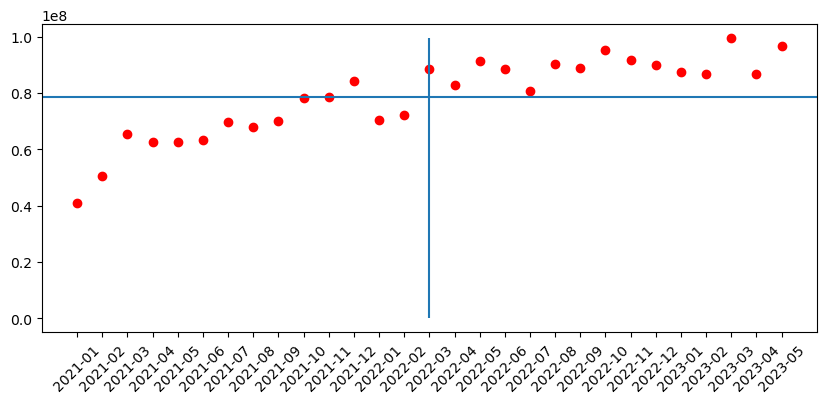

In [50]:
fig, ax = plt.subplots()
plt.rcParams['figure.figsize'] = [10, 4]

ax.plot(fechas, afluencias, 'ro')

#plt.axhline(max)
plt.axhline(mean)
#plt.axhline(min)
plt.vlines(int(len(afluencias)/2),0, max)
#plt.axhline(np.median(d2))
#plt.axhline(stat.mode(d2))

ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
plt.xticks(rotation=45)
plt.show()